# Fishery Production

Visualizing fishery production in tons by type (capture and aquaculture)

*Author: Rachel Thoms
<br>Created: 18 Aug 2021
<br>Environment: jupyterlab*

## Style

- Vega chart
- Stacked bar chart
- Values - production quantity in tonnes by type (capture and aquaculture)

## Data

- Data: [ow_widget_territory](https://resourcewatch.carto.com/u/wri-rw/dataset/ow_widget_territory) (full dataset - [foo_062_rw0_fishery_production](https://resourcewatch.carto.com/u/wri-rw/dataset/foo_062_rw0_fishery_production_edit))
- Resource Watch: [explore page](https://resourcewatch.org/data/explore/ac9c2f07-9f23-4a33-9958-e02c571ec009)
- Source: [FAO Food Balance Sheets](http://www.fao.org/faostat/en/#data/FBS)

## Preparation

### Aliasing and Inserting Data

#### Queries

Query 1

``` SQL
INSERT INTO ow_widget_territory(section, widget, gid_0, name_0, variable, date, value, unit)
SELECT 'goods_services' AS section, 'fishery production' AS widget, alias.iso AS gid_0, alias.name_0 AS name_0, data.variable AS variable, data.date AS date, data.value AS value, data.unit AS unit 
FROM (SELECT name_en, iso3_code, year as date, SUM(value) AS value , type as variable, unit FROM foo_062_rw0_fishery_production_edit WHERE measure = 'Q_tlw' GROUP BY name_en, iso3_code, date, variable, unit) data
LEFT JOIN ow_aliasing_countries AS alias ON  alias.iso = data.iso3_code WHERE alias.iso IS NOT NULL
```

- countries with data: 238 (coastal = 193)
- rows before: 37115
- rows inserted: 72017
- rows after: 109132

```sql

```

### Vega

In [7]:
import json
from vega import Vega
from IPython.display import display

In [8]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [9]:
widget_width = 500
widget_height = 200

## Visualization

### Queries

#### Testing

```gadm.geostore_prod ILIKE 'ca5bfde08587530e76c17fe48362a01d'``` used as stand-in for parameterized ```{{{geostore_env}}='{{geostore_id}}'``` in production version

``` sql
SELECT gadm.gid_0, variable, date, value FROM ow_widget_territory AS data 
LEFT OUTER JOIN  gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE widget = 'fishery production' AND variable != 'GlobalProduction_quantity' AND gadm.geostore_prod ILIKE 'f4599aaeedacb9e6ddca177a93795e4c' 
ORDER BY date ASC, variable DESC
```

#### Parameterized Version

```sql
SELECT gadm.gid_0, variable, date, value FROM ow_widget_territory AS data 
LEFT OUTER JOIN  gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE widget = 'fishery production' AND variable != 'GlobalProduction_quantity' AND gadm.{{geostore_env}} ILIKE '{{geostore_id}}' 
ORDER BY date ASC, variable DESC
```

```sql

```

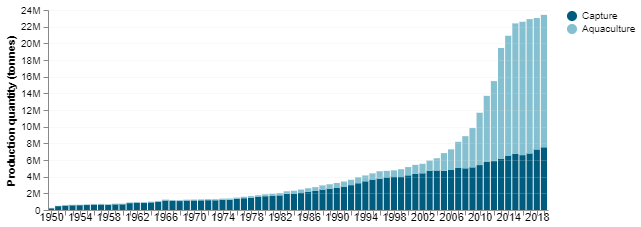

In [10]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "A basic stacked bar chart example.",
  "width": 500,
  "height": 200,
  "padding": 5,
  "data": [
    {
      "name": "production",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, variable, date, value FROM ow_widget_territory WHERE widget = 'fishery production' AND gid_0 = 'IDN' AND variable != 'GlobalProduction_quantity' ORDER BY date ASC, variable DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {"type": "stack", "field": "value", "groupby": ["gid_0", "date"]},
        {
          "type": "formula",
          "expr": "split(datum.variable, '_')[0]",
          "as": "variable"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {"data": "production", "field": "date"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {"data": "production", "field": "y1"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": ["#005c7e", "#84c0d0"],
      "domain": {"data": "production", "field": "variable"}
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelFont": "Arial",
      "labelFontSize": 11,
      "labelOverlap": true,
      "labelBaseline": "middle",
      "tickSize": 5
    },
    {
      "orient": "left",
      "scale": "y",
      "zindex": 1,
      "title": "Production quantity (tonnes)",
      "titleFont": "Arial",
      "titleFontStyle": "normal",
      "labelFont": "Arial",
      "labelBaseline": "middle",
      "labelAlign": "right",
      "labelPadding": 3,
      "grid": true,
      "gridOpacity": 0.2,
      "encode": {
        "labels": {"update": {"text": {"signal": "format(datum.value, '~s')"}}}
      }
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "production"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "date"},
          "width": {"scale": "x", "band": 1, "offset": -1},
          "y": {"scale": "y", "field": "y0"},
          "y2": {"scale": "y", "field": "y1"},
          "fill": {"scale": "color", "field": "variable"},
          "tooltip": {
            "signal": "{'Year': datum.date, 'Production type': datum.variable, 'Production quantity': format(datum.value, ',.5r') + ' tonnes'}"
          }
        },
        "update": {"fillOpacity": {"value": 1}},
        "hover": {"fillOpacity": {"value": 0.7}}
      }
    }
  ],
  "legends": [
    {"fill": "color", "orient": "right"}
  ]
}""")
vegaview=dict(spec)
Vega(vegaview)

## Visualization 

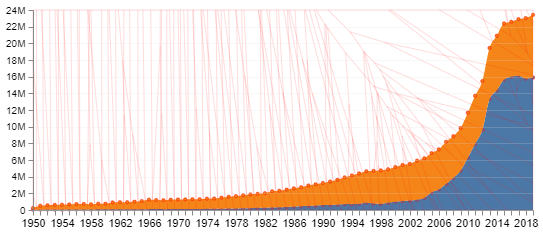

In [11]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "A basic stacked area chart example.",
  "width": 500,
  "height": 200,
  "padding": 5,

  "data": [{
      "name": "production",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, variable, date, value FROM ow_widget_territory WHERE widget = 'fishery production' AND gid_0 = 'IDN' AND variable != 'GlobalProduction_quantity' ORDER BY date ASC, variable ASC",
      "format": {"type": "json", "property": "rows"},
      "transform": [{"type": "stack",
          "field": "value",
          "groupby": ["gid_0","date"]
          }]
    },
    {
      "name": "highlightedPoint",
      "source": "production",
      "transform": [
        {
          "type": "filter",
          "expr": "(hover && hover.datum.date === datum.date && hover.datum.y1 === datum.y1) "
        }
      ]
    }
  ],
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@points_voronoi:mouseover", "update": "datum"},
        {"events": "@points_voronoi:mouseout", "update": "null"}
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {"data": "production", "field": "date"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true, "zero": true,
      "domain": {"data": "production", "field": "y1"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {"data": "production", "field": "variable"}
    }
  ],

  "axes": [
    {"orient": "bottom", 
    "scale": "x", 
    "zindex": 1,
    "labelFont": "Arial",
    "labelFontSize":11, 
    "labelOverlap": true},
    {"orient": "left", 
    "scale": "y", 
    "zindex": 1,
    "labelFont": "Arial", 
    "labelBaseline": "middle",
    "labelAlign": "right",
    "labelPadding": 3,
    "grid": true,
    "gridOpacity": 0.2,
    "encode":{
        "labels":{
          "update":{
            "text": {"signal": "format(datum.value, '~s')"}
          }
        }
      }}
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "production",
          "groupby": "variable"
        }
      },
      "marks": [
        {
          "type": "area",
          "from": {"data": "series"},
          "encode": {
            "enter": {
              "interpolate": {"value": "monotone"},
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "y0"},
              "y2": {"scale": "y", "field": "y1"},
              "fill": {"scale": "color", "field": "variable"}
            },
            "update": {
              "fillOpacity": {"value": 1}
            },
            "hover": {
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "name": "points_on_line_1",
          "from": {"data": "series"},
          "type": "symbol",
          "encode": {
            "update": {
              "fill": {"value": "ref"},
              "size": {"value": 10},
              "stroke": {"value": "red"},
              "strokeWidth": {"value": 0.5},
              "x": {"field": "date", "scale": "x"},
              "y": {"field": "y1", "scale": "y"}
            }
          }
        },
        {
          "name": "points_voronoi",
          "type": "path",
          "from": {"data": "points_on_line_1"},
          "encode": {
            "update": {
              "fill": {"value": "transparent"},
              "strokeWidth": {"value": 0.35},
              "stroke": {"value": "red"},
              "strokeOpacity": {"value": 0.2},
              "isVoronoi": {"value": true},
              "tooltip": {"signal": "datum"}
            }
          },
          "transform": [
            {
              "type": "voronoi",
              "x": "datum.x",
              "y": "datum.y",
              "size": [{"signal": "width"}, {"signal": "height"}]
            }
          ]
        },
        {
          "from": {"data": "highlightedPoint"},
          "type": "symbol",
          "interactive": false,
          "encode": {
            "update": {
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "y1"},
              "stroke": {"value": "orange"},
              "strokeWidth": {"value": 4},
              "fill": {"value": "white"},
              "size": {"value": 150},
              "strokeOpacity": {"value": 0.3}
            }
          }
        }
      ]
    }
  ]
}""")
vegaview=dict(spec)
Vega(vegaview)

## RW Backoffice

- [back office](https://resourcewatch.org/admin/data/widgets/bf6604e1-9f6b-4988-ace0-80db05248a9a/edit?dataset=ac9c2f07-9f23-4a33-9958-e02c571ec009)
- parent dataset [foo.062](https://resourcewatch.org/data/explore/ac9c2f07-9f23-4a33-9958-e02c571ec009) (unpublished)
- dataset id ```ac9c2f07-9f23-4a33-9958-e02c571ec009```
- widget id: ```bf6604e1-9f6b-4988-ace0-80db05248a9a```